<a href="https://colab.research.google.com/github/dhanvina/Data-science-basics/blob/main/bda_lab_practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import plotly.express as px

df = px.data.iris()
px.line(df, y="sepal_width").show()
px.line(df, y="sepal_width", line_group='species').show()

df = px.data.tips()
px.bar(df, x='day', y="total_bill").show()
px.histogram(df, x="total_bill").show()
px.histogram(df, x="total_bill", color='sex', nbins=50, histnorm='percent', barmode='overlay').show()
px.pie(df, values="total_bill", names="day").show()
px.box(df, x="day", y="tip").show()
px.violin(df, x="day", y="tip").show()
px.scatter_3d(df, x="total_bill", y="sex", z="tip").show()


In [ ]:
from sklearn.datasets import make_blobs
from sklearn.cluster import OPTICS
import numpy as np
import matplotlib.pyplot as plt

# Configuration options
num_samples_total = 1000
cluster_centers = [(3,3), (7,7)]
epsilon = 2.0
min_samples = 22

# Generate data
X, _ = make_blobs(n_samples=num_samples_total, centers=cluster_centers, n_features=len(cluster_centers), center_box=(0, 1), cluster_std=0.5)

# Compute OPTICS
db = OPTICS(max_eps=epsilon, min_samples=min_samples).fit(X)
labels = db.labels_
no_clusters = len(np.unique(labels))
no_noise = np.sum(labels == -1)

# Generate scatter plot for training data
colors = ['#3b4cc0' if x == 1 else '#b40426' for x in labels]
plt.scatter(X[:,0], X[:,1], c=colors, marker="o", picker=True)
plt.title('OPTICS clustering')
plt.xlabel('Axis X[0]')
plt.ylabel('Axis X[1]')
plt.show()

# Generate reachability plot
plt.plot(db.reachability_[db.ordering_])
plt.title('Reachability plot')
plt.show()

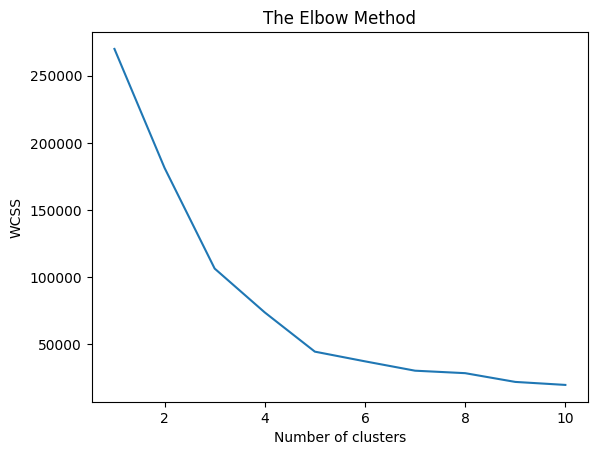

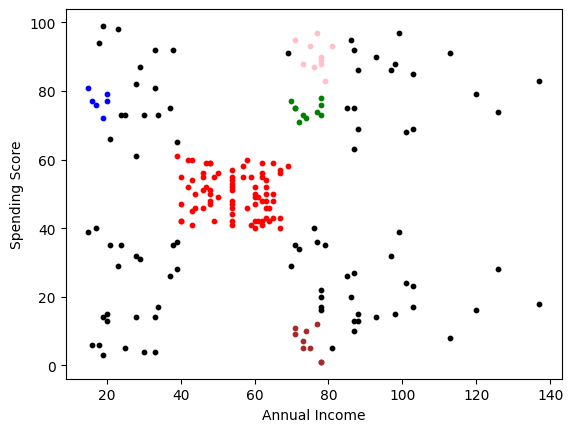

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, DBSCAN

# Load data
df = pd.read_csv("/content/Mall_Customers.csv").iloc[:, [3,4]].values

# KMeans clustering
wcss = [KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10).fit(df).inertia_ for i in range(1, 11)]
plt.plot(range(1, 11), wcss)
plt.title("The Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()

# DBSCAN clustering
labels = DBSCAN(eps=5, min_samples=5).fit_predict(df)

# Visualize clusters
unique_labels = np.unique(labels)
colors = ['black', 'blue', 'red', 'green', 'brown', 'pink', 'yellow', 'silver']
for i, label in enumerate(unique_labels):
    plt.scatter(df[labels == label, 0], df[labels == label, 1], s=10, c=colors[i] if label != -1 else 'black')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()


program 7

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

customer_data = pd.read_csv('hierarchical-clustering-with-python-and-scikit-learn-shopping-data.csv')
data = customer_data.iloc[:, 3:5].values

plt.figure(figsize=(10, 7))
dend = dendrogram(linkage(data, method='ward'))
plt.title("Customer Dendograms")

cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
labels = cluster.fit_predict(data)

plt.figure(figsize=(10, 7))
plt.scatter(data[:,0], data[:,1], c=labels, cmap='rainbow')

program 1

In [ ]:
#mapper
import sys

for line in sys.stdin:
    line = line.strip()
    words = line.split()
    for word in words:
        print(f"{word}\t1")

#reducer.py
import sys

current_word = None
current_count = 0

for line in sys.stdin:
    word, count_str = line.strip().split('\t', 1)

    try:
        count = int(count_str)
    except ValueError:
        continue

    if current_word == word:
        current_count += count
    else:
        if current_word is not None:
            print(f"{current_word}\t{current_count}")
        current_count = count
        current_word = word

if current_word is not None:
    print(f"{current_word}\t{current_count}")


program 2

In [ ]:
#mapper
import sys

for line in sys.stdin:
    fields = line.strip().split(",")
    if len(fields) == 3:
        salary = int(fields[2])
        print(f"{salary}\t1")

#reducer
import sys

total_salary = 0
employee_count = 0

for line in sys.stdin:
    salary, count = map(int, line.strip().split('\t'))
    total_salary += salary * count
    employee_count += count

average_salary = total_salary / employee_count
print(f"Average salary: {average_salary}")


program 3

In [ ]:
#mapper
import sys

for line in sys.stdin:
    salary = line.strip().split('\t')[2]
    print(f"{None}\t{salary}")

#reducer
import sys

max_salary = 0

for line in sys.stdin:
    try:
        salary = int(line.strip().split('\t', 1)[1])
        max_salary = max(max_salary, salary)
    except ValueError:
        continue

print(f"Max Salary: {max_salary}")


program 4

In [ ]:
#mapper
import sys
import csv
for line in csv.reader(iter(sys.stdin.readline, '')):
    year = line[0]
    sales = line
    print(f"{year}\t{sales}")

#reducer
#!/usr/bin/env python

import sys

current_year = None
total_sales = 0

for line in sys.stdin:
    year, sales = line.strip().split('\t')
    if current_year is None:
        current_year = year
    if year == current_year:
        total_sales += int(sales)
    else:
        print(f"{current_year}\t{total_sales}")
        current_year = year
        total_sales = int(sales)

if current_year is not None:
    print(f"{current_year}\t{total_sales}")


program 5

In [ ]:
#mapper.py
import sys

for line in sys.stdin:
    document, words = line.strip().split(" ", 1)
    for word in words.split():
        print(f"{word}\t{document}")

#reducer
import sys

current_word = None
doc_list = []

for line in sys.stdin:
    line = line.strip()
    word, document = line.split("\t", 1)

    if current_word == word:
        doc_list.append(document)
    else:
        if current_word:
            print(f"{current_word}\t{', '.join(set(doc_list))}")
        doc_list = [document]
        current_word = word

if current_word:
    print(f"{current_word}\t{', '.join(set(doc_list))}")


In [ ]:
# program 6
gedit big.txt
hdfs dfs -put big.txt
localhost:9870
var linesRDD = sc.textFile("hdfs://localhost:54310/big.txt")
linesRDD.collect
var wordsRDD = linesRDD.flatMap(_.split(" "))
wordsRDD.collect
var wordsKvRdd = wordsRDD.map((_, 1))
wordsKvRdd.collect
var wordCounts = wordsKvRdd.reduceByKey(_ + _ )
wordCounts.collect
wordCounts.saveAsTextFile("hdfs://localhost:54310/output1")